<a href="https://colab.research.google.com/github/umesh2908/LSTM-time-series-forecasting-of-AG-load/blob/master/Darts_Time_Series_Forecasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.

In [2]:
import darts

In [84]:
import pandas as pd
data=pd.read_csv('/content/Hourly_price_2021_2022.csv')

In [87]:
import pandas as pd
ERdata=pd.read_excel('/content/ERCOT_DAM.xlsx')
#ERdata.columns=data.iloc[0]
ERdata.drop(index=ERdata.index[0], axis=0, inplace=True)
ERdata.head()

,Unnamed: 0,Unnamed: 1
1,2021-01-01 00:00:00,18.18
2,2021-01-01 01:00:00,17.56
3,2021-01-01 02:00:00,17.02
4,2021-01-01 03:00:00,17.14
5,2021-01-01 04:00:00,17.18


In [88]:
data.head()
data=data[['Date','y']]


In [89]:
##ADDED for ERCOT data




In [90]:
import pandas as pd
from darts import TimeSeries

seris=TimeSeries.from_dataframe(data,time_col='Date',value_cols='y',freq='H')


In [91]:
df=data[['Date','y']]

In [92]:
df.head()

,Date,y
0,1/1/2021 0:00,2286
1,1/1/2021 1:00,2097
2,1/1/2021 2:00,2008
3,1/1/2021 3:00,2008
4,1/1/2021 4:00,2039


In [93]:
df.set_index('Date',inplace=True)

In [94]:
df

,y
Date,
1/1/2021 0:00,2286
1/1/2021 1:00,2097
1/1/2021 2:00,2008
1/1/2021 3:00,2008
1/1/2021 4:00,2039
...,...
6/19/2023 19:00,10000
6/19/2023 20:00,10000
6/19/2023 21:00,10000


<Figure size 1800x600 with 0 Axes>

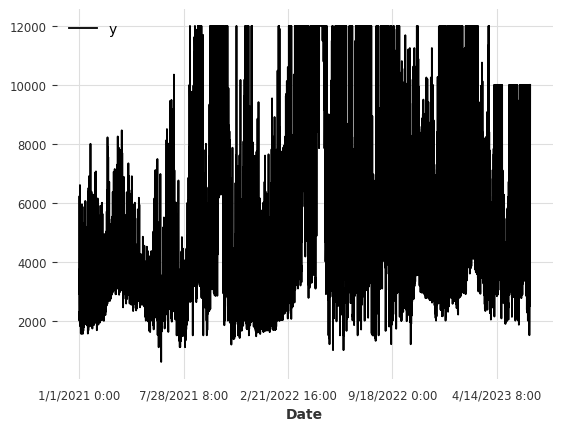

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
df.plot(label='IEX_price (Rs./MWh)')

plt.legend();

In [96]:
duplicated = df.index.duplicated()
print(df[duplicated])

Empty DataFrame
Columns: [y]
Index: []


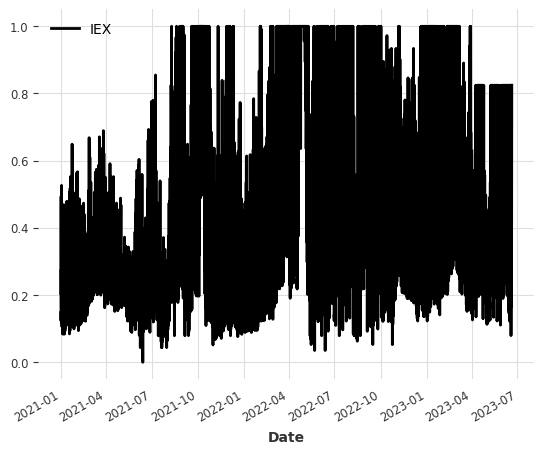

In [97]:
from darts.dataprocessing.transformers import Scaler
import matplotlib.pyplot as plt

scaler = Scaler()
IEX_scaled=scaler.fit_transform(seris)

IEX_scaled.plot(label='IEX')

In [98]:
# Train And Validation Split
len=7*24
train, val = IEX_scaled[:-len], IEX_scaled[-len:]

In [99]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [100]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=40, random_state=0)

In [101]:
model.fit(train, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=40` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=40, random_state=0)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 25.85%


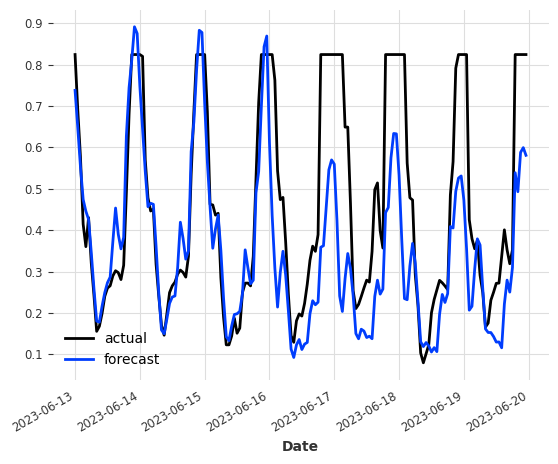

In [102]:
pred = model.predict(n=24*7, series=train)
val.plot(label='actual')
#IEX_scaled[-len:].plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(val, pred)))

MAPE = 22.61%


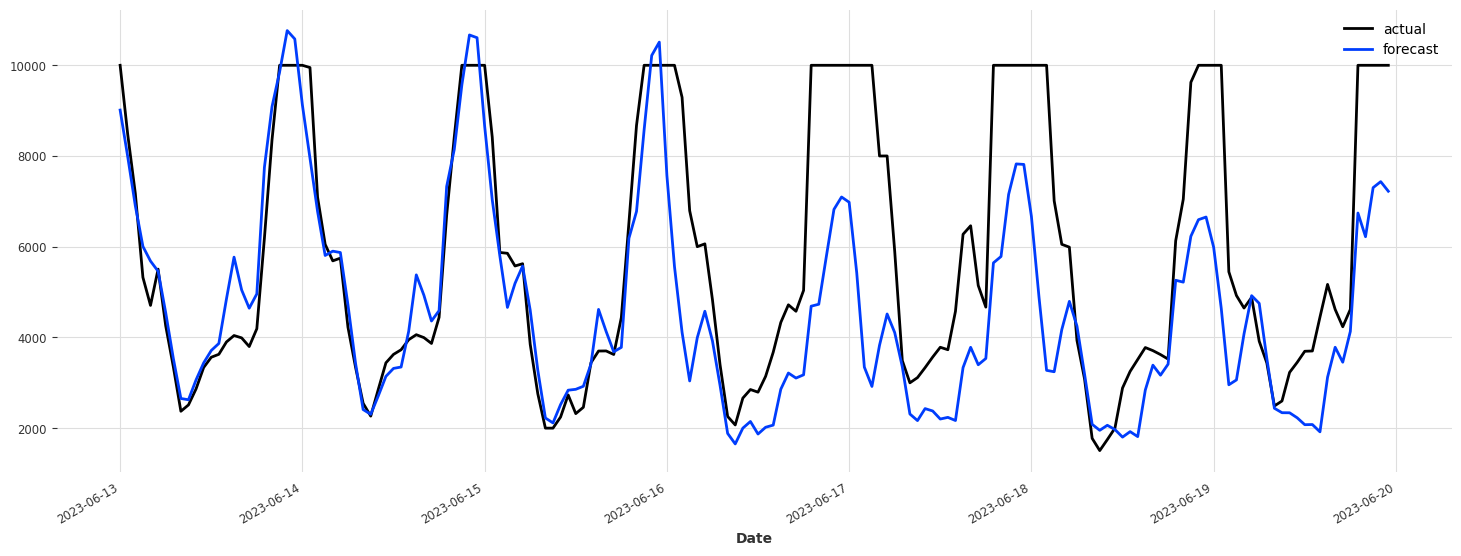

In [103]:
y_pred=scaler.inverse_transform(pred)
IEX=scaler.inverse_transform(val)
plt.figure(figsize=(18, 6))
IEX[-len:].plot(label='actual')
y_pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(IEX, y_pred)))

In [106]:
import pandas as pd
from darts import TimeSeries

# Assuming y_pred is a Darts time series data array

# Convert the Darts time series to pandas DataFrame
y_pred_df = pd.DataFrame(data=y_pred.univariate_values(), index=y_pred.time_index, columns=['y_pred'])
IEX_df = pd.DataFrame(data=IEX.univariate_values(), index=IEX.time_index, columns=['IEX'])
y_pred_df['IEX']=IEX_df
# Save the DataFrame to a CSV file
y_pred_df.to_csv('13-20 June 2023 forecast.csv')


In [105]:
y_pred_df

,y_pred,IEX
Date,,
2023-06-13 00:00:00,9012.517861,10000.0
2023-06-13 01:00:00,7984.120793,8475.0
2023-06-13 02:00:00,6903.259059,7175.0
2023-06-13 03:00:00,6006.476341,5324.0
2023-06-13 04:00:00,5683.501906,4706.0
...,...,...
2023-06-19 19:00:00,6742.931331,10000.0
2023-06-19 20:00:00,6220.421816,10000.0
2023-06-19 21:00:00,7302.404787,10000.0


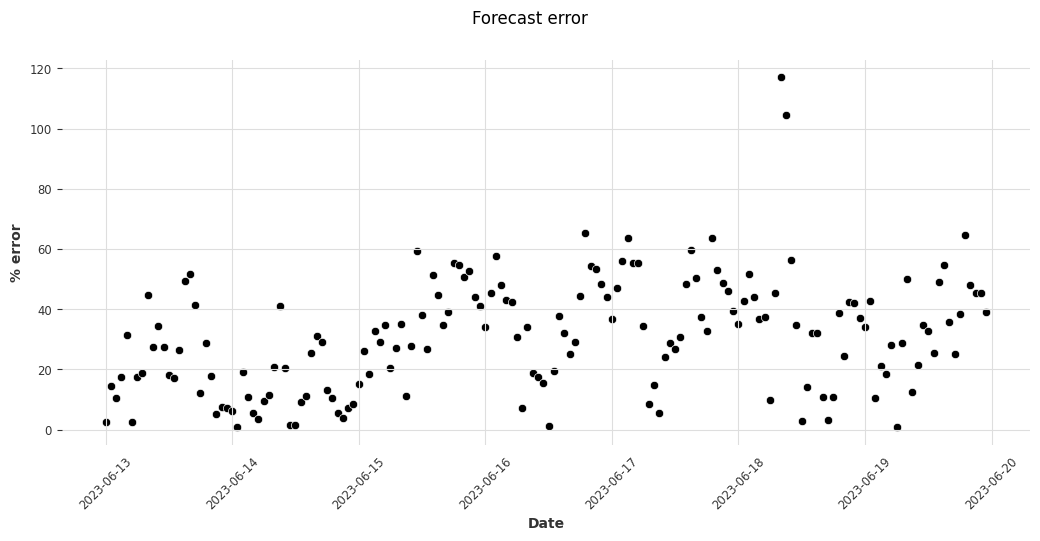

In [65]:
import numpy as np
import seaborn as sns

y_pred_df['Date']=y_pred_df.index
y_pred_df['% error']=((np.absolute(y_pred_df['y_pred']-y_pred_df['IEX']))/y_pred_df['IEX'])*100
fig = plt.gcf()
fig.set_size_inches(12.5, 5)
fig.savefig('test2png.png', dpi=100)
sns.scatterplot( y_pred_df['% error'])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.suptitle('Forecast error')
plt.show()

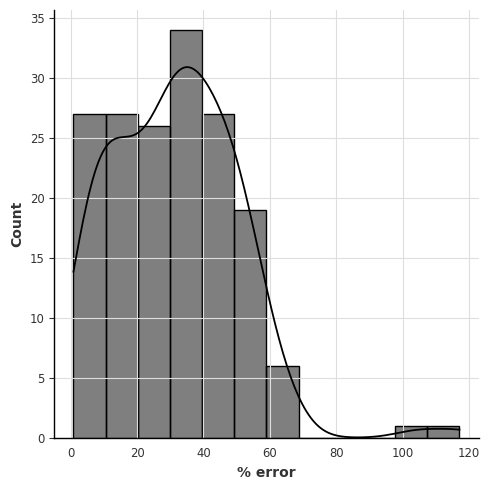

In [66]:
sns.displot(y_pred_df['% error'],kde=True)

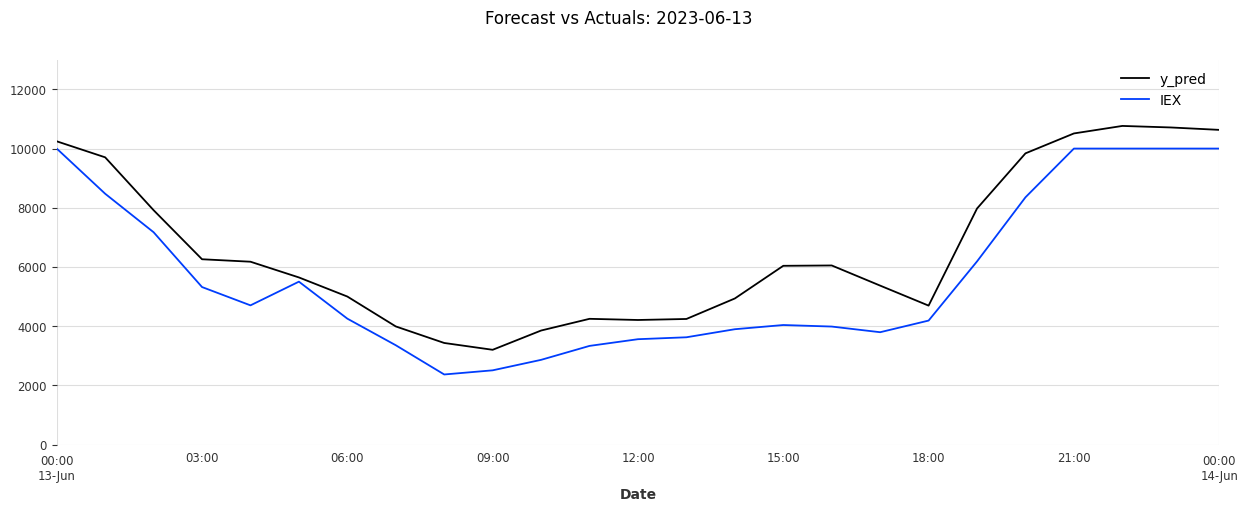

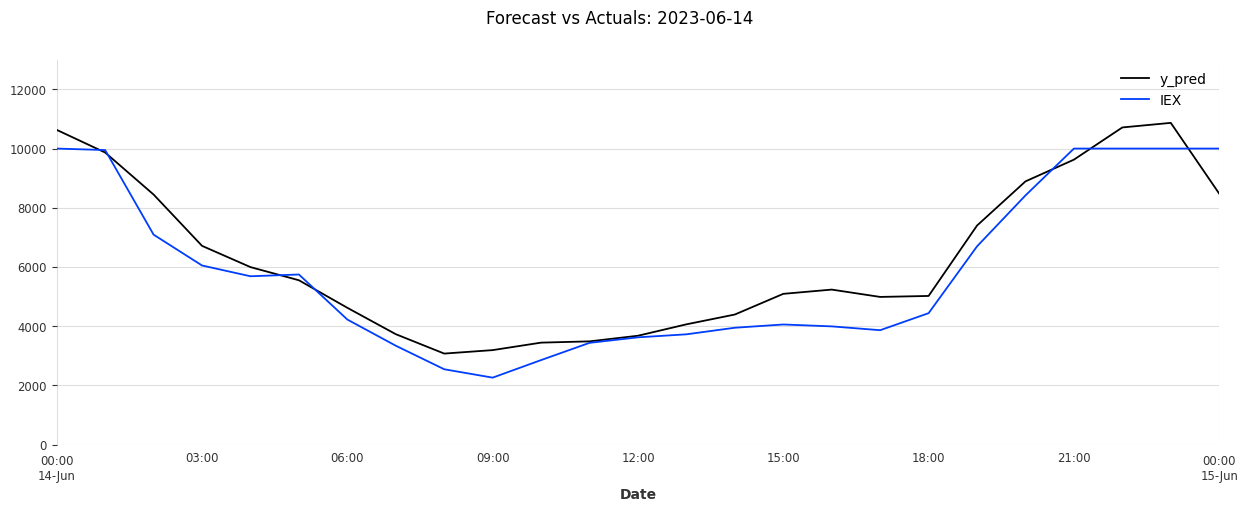

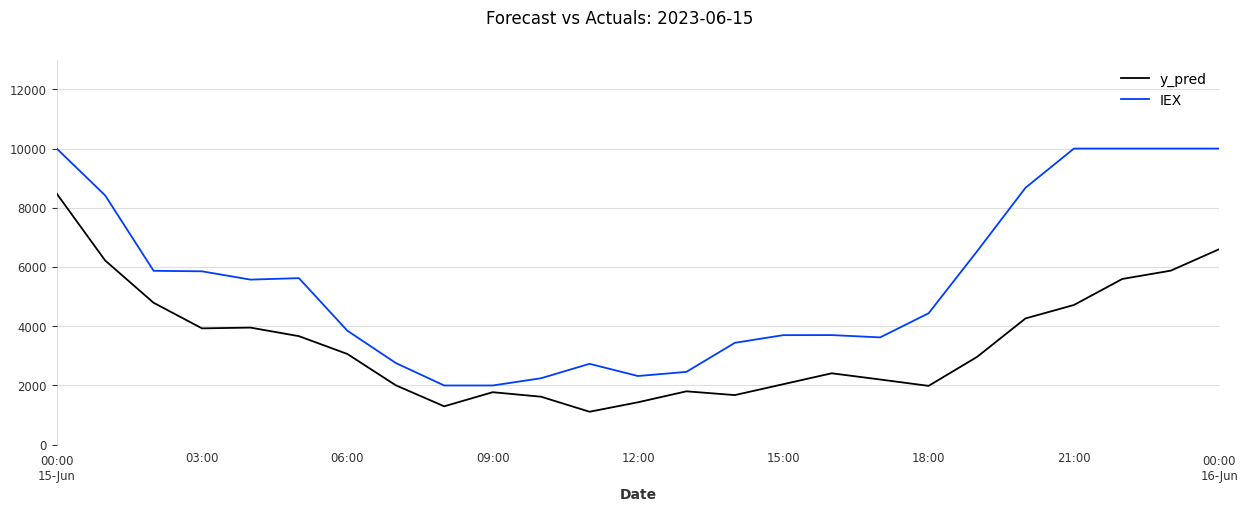

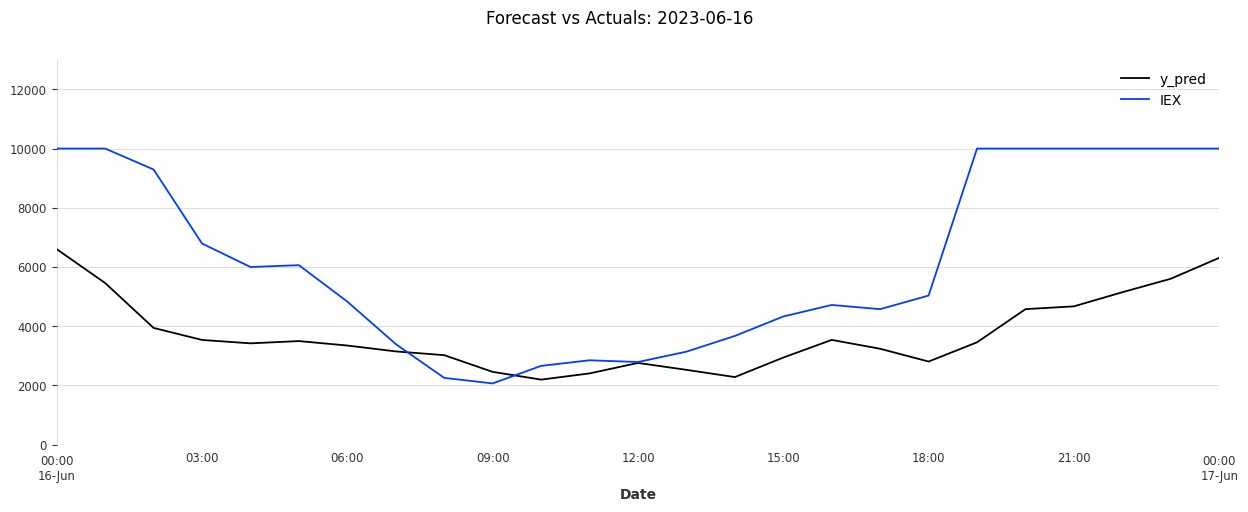

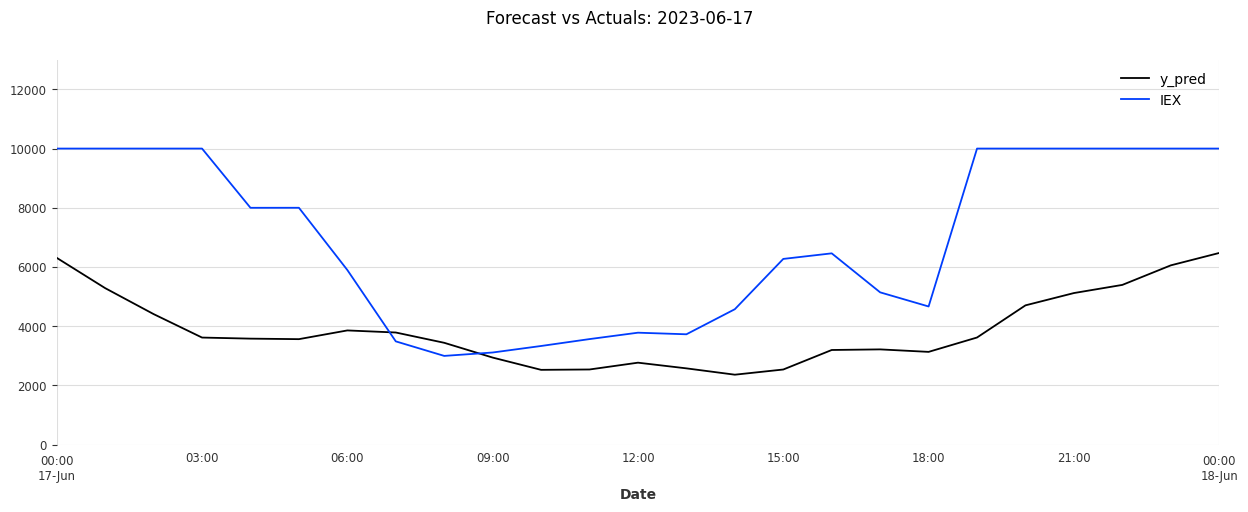

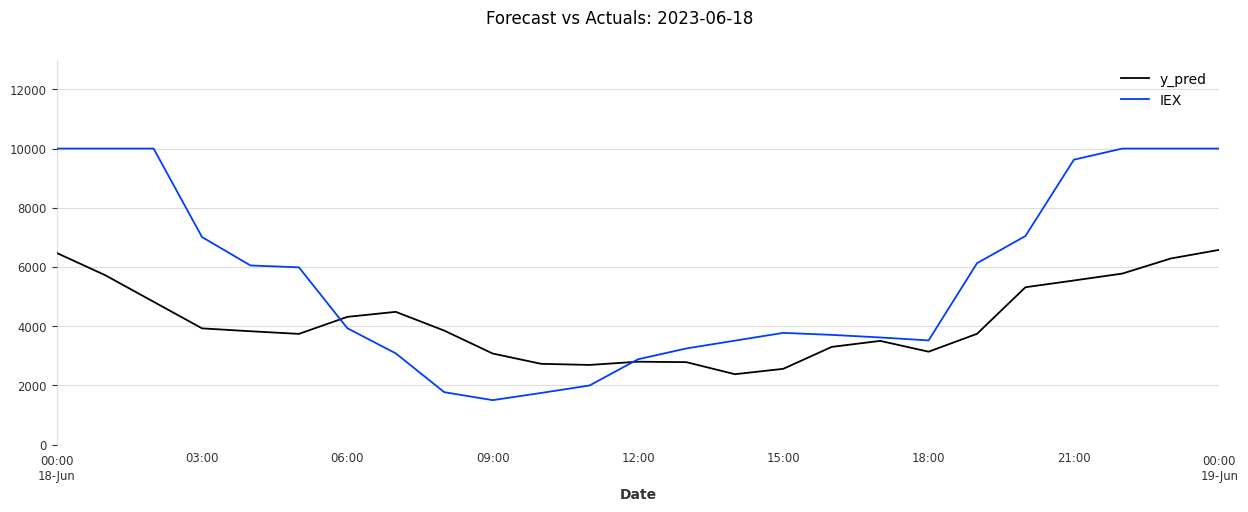

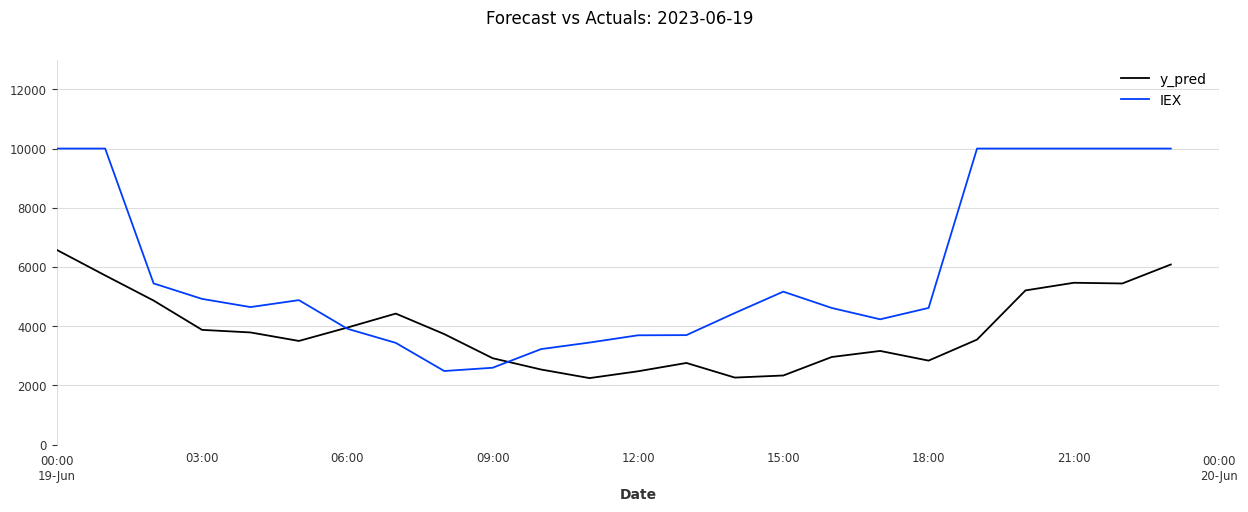

In [68]:

start_date = '2023-06-13'
end_date = '2023-06-19'


# Create a list of dates between the start and end dates
date_list = pd.date_range(start=start_date, end=end_date, freq='D')

# Loop over each date in the list and create a separate plot
for date in date_list:
    # Select the subset of data for the current date
    #subset = Base[Base['Date'] == date]
    subset = y_pred_df[['y_pred','IEX']]

    # Check if the subset is empty, and skip to the next date if it is
    #if subset.empty:
     #   continue

    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)

    # Plot the forecasted and actual values for the current date
    subset[['y_pred', 'IEX']].plot(ax=ax, style=['-', '-'])

    ax.set_xbound(date, date + pd.Timedelta(days=1))


    ax.set_ylim(0, 13000)

    # Set the title of the plot to indicate the current date
    plot = plt.suptitle('Forecast vs Actuals: {}'.format(date.strftime('%Y-%m-%d')))

    plt.show()

